<a href="https://colab.research.google.com/github/PreetiRonghe/Datascience/blob/main/news_paper_main_updated_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [6]:
data.isnull().sum()

,0
Newspaper,0
daily,0
sunday,0


Text(0.5, 1.0, 'Scatterplot Sunday vs Daily')

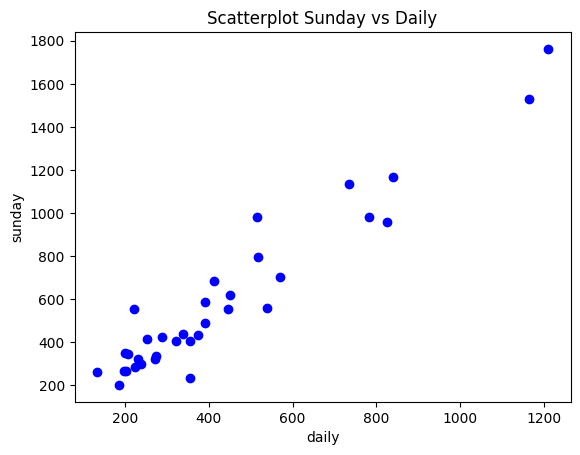

In [7]:
#Scatterplots
plt.plot(data.daily,data.sunday, "bo")
plt.xlabel("daily")
plt.ylabel("sunday")
plt.title('Scatterplot Sunday vs Daily')

<Axes: xlabel='daily', ylabel='Density'>

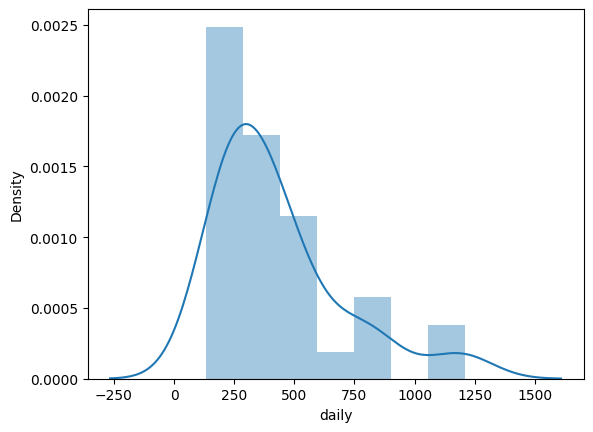

In [8]:

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

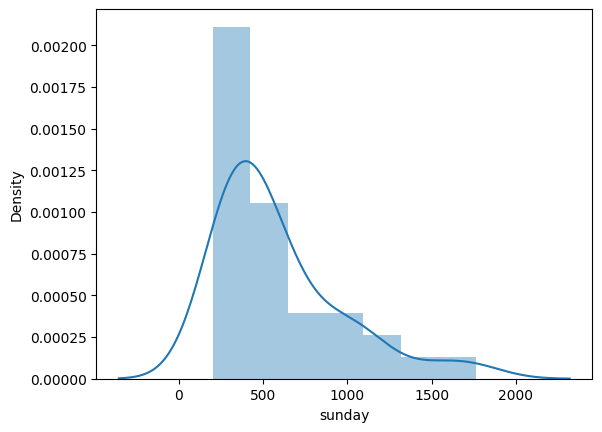

In [9]:
sns.distplot(data['sunday'])

<Axes: xlabel='daily', ylabel='sunday'>

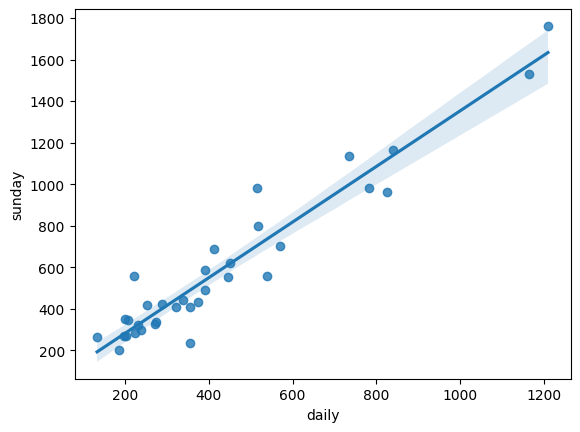

In [10]:
sns.regplot(x="daily", y="sunday", data=data)

# Correlation

In [12]:
data.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Fitting a Linear Regression Model

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           6.02e-19
Time:                        05:37:21   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Coefficients
model.params

,0
Intercept,13.835630
daily,1.339715


In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [17]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,250,350])

In [18]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [19]:
model.predict(data_pred)

,0
0,281.778581
1,348.764319
2,482.735795
